In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [162]:
df = pd.read_parquet('/kaggle/input/completedf/df.gzip')

In [163]:
RFM = pd.read_parquet('/kaggle/input/marketing/RFM.gzip')

# Clustering Hiérarchique Agglomératif

In [164]:
df = df.dropna()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,timestamp
178,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20 00:00:00,1.0,a0b7d5a992ccda646f2d34e418fff5a0,...,SP,37564.0,borda da mata,MG,3366,-23.565578,-46.534603,sao paulo,SP,2018-07-26 18:25:40
878,2c40105463f11c726046975015826e55,413d2872cfbed54cae78de93afc7912e,delivered,2018-04-20 09:36:11,2018-04-20 09:52:57,2018-04-23 20:12:52,2018-04-30 16:58:43,2018-05-25 00:00:00,1.0,32e18e89237933ebdaaebd78a27e7fa1,...,SC,4361.0,sao paulo,SP,88032,-27.536913,-48.509018,florianopolis,SC,2018-04-20 09:36:11
2584,ee2c523648f8d3fddba9f09bc16a6490,22d503cfcbf60af5fbe6a0dea1b48102,delivered,2018-04-22 03:25:16,2018-04-24 18:59:39,2018-04-23 18:51:29,2018-04-26 10:48:46,2018-05-10 00:00:00,1.0,2948658cb6abc82847412be7201bfc4c,...,SP,4782.0,sao paulo,SP,8577,-23.482623,-46.374490,itaquaquecetuba,SP,2018-04-22 03:25:16
3279,e0145369394f83a5210ad16511c6cf33,5c7ad9cbcfbe41d1dd622c64bb0812bd,delivered,2018-07-01 14:28:04,2018-07-02 12:15:15,2018-07-03 08:05:00,2018-07-07 18:26:29,2018-08-02 00:00:00,1.0,bace90a7338e9d31371ad47811cf4c7d,...,SP,89224.0,joinville,SC,8577,-23.482623,-46.374490,itaquaquecetuba,SP,2018-07-01 14:28:04
6981,7d6b40109573304141d61d0eb6819e48,1b622df06565612870f1f1ae7f77bee8,delivered,2018-05-29 13:55:18,2018-05-29 14:41:53,2018-05-30 13:19:00,2018-06-02 13:22:53,2018-06-21 00:00:00,1.0,629397d35e30e4a0b7d3da8bf69be7ca,...,SP,4782.0,sao paulo,SP,13060,-22.943831,-47.112332,campinas,SP,2018-05-29 13:55:18


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9416 entries, 178 to 18188105
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       9416 non-null   object        
 1   customer_id                    9416 non-null   object        
 2   order_status                   9416 non-null   object        
 3   order_purchase_timestamp       9416 non-null   object        
 4   order_approved_at              9416 non-null   object        
 5   order_delivered_carrier_date   9416 non-null   object        
 6   order_delivered_customer_date  9416 non-null   object        
 7   order_estimated_delivery_date  9416 non-null   object        
 8   order_item_id                  9416 non-null   float64       
 9   product_id                     9416 non-null   object        
 10  seller_id                      9416 non-null   object        
 11  shipping_li

In [166]:
dtype(df['customer_unique_id'])

dtype('O')

In [167]:
RFM

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Clusters
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90,1,4,2,142,7,2
0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,1,4,4,144,9,2
0000f46a3911fa3c0805444483337064,585,1,69.00,4,4,3,443,11,1
0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,3,4,4,344,11,1
0004aac84e0df4da2b147fca70cf8255,336,1,180.00,3,4,1,341,8,1
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,680.00,4,4,1,441,9,1
fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89,3,4,3,343,10,1
ffff371b4d645b6ecea244b27531430a,616,1,89.90,4,4,2,442,10,1


In [168]:
### label encoding city and state names
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['order_id']=encoder.fit_transform(df['order_id'])
df['customer_unique_id']=encoder.fit_transform(df['customer_unique_id'])

In [169]:
data = df.groupby('customer_unique_id').agg({'order_id':'nunique',
                                    'product_id':'nunique',
                                    'payment_value':'mean',
                                    'review_score':'mean',
                                    'seller_id': 'nunique',
                                    'product_photos_qty':'median',
                                   })
data

,order_id,product_id,payment_value,review_score,seller_id,product_photos_qty
customer_unique_id,,,,,,
0,1,1,141.90,5.0,1,1.0
1,1,1,27.75,5.0,1,1.0
2,1,1,122.07,4.0,1,5.0
3,1,1,164.81,2.0,1,1.0
4,1,1,197.27,5.0,1,5.0
...,...,...,...,...,...,...
9310,1,1,93.11,5.0,1,1.0
9311,1,1,72.76,5.0,1,1.0
9312,1,1,200.90,5.0,1,1.0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9315 entries, 0 to 9314
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            9315 non-null   int64  
 1   product_id          9315 non-null   int64  
 2   payment_value       9315 non-null   float64
 3   review_score        9315 non-null   float64
 4   seller_id           9315 non-null   int64  
 5   product_photos_qty  9315 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 509.4 KB


In [171]:
# Need to normalize the data because this uses distances
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled=scaler.fit_transform(data)

In [172]:
scaled

array([[-0.10074173, -0.09153846, -0.13826117,  0.71971545, -0.08134475,
        -0.72834664],
       [-0.10074173, -0.09153846, -0.58565614,  0.71971545, -0.08134475,
        -0.72834664],
       [-0.10074173, -0.09153846, -0.21598209,  0.05626672, -0.08134475,
         1.58937441],
       ...,
       [-0.10074173, -0.09153846,  0.09298108,  0.71971545, -0.08134475,
        -0.72834664],
       [-0.10074173, -0.09153846, -0.37103198,  0.71971545, -0.08134475,
        -0.72834664],
       [-0.10074173, -0.09153846, -0.17043912,  0.71971545, -0.08134475,
         0.43051389]])

In [173]:
columns = data.columns
columns

Index(['order_id', 'product_id', 'payment_value', 'review_score', 'seller_id',
       'product_photos_qty'],
      dtype='object')

In [174]:
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled

,order_id,product_id,payment_value,review_score,seller_id,product_photos_qty
0,-0.100742,-0.091538,-0.138261,0.719715,-0.081345,-0.728347
1,-0.100742,-0.091538,-0.585656,0.719715,-0.081345,-0.728347
2,-0.100742,-0.091538,-0.215982,0.056267,-0.081345,1.589374
3,-0.100742,-0.091538,-0.048469,-1.270631,-0.081345,-0.728347
4,-0.100742,-0.091538,0.078754,0.719715,-0.081345,1.589374
...,...,...,...,...,...,...
9310,-0.100742,-0.091538,-0.329487,0.719715,-0.081345,-0.728347
9311,-0.100742,-0.091538,-0.409246,0.719715,-0.081345,-0.728347
9312,-0.100742,-0.091538,0.092981,0.719715,-0.081345,-0.728347
9313,-0.100742,-0.091538,-0.371032,0.719715,-0.081345,-0.728347


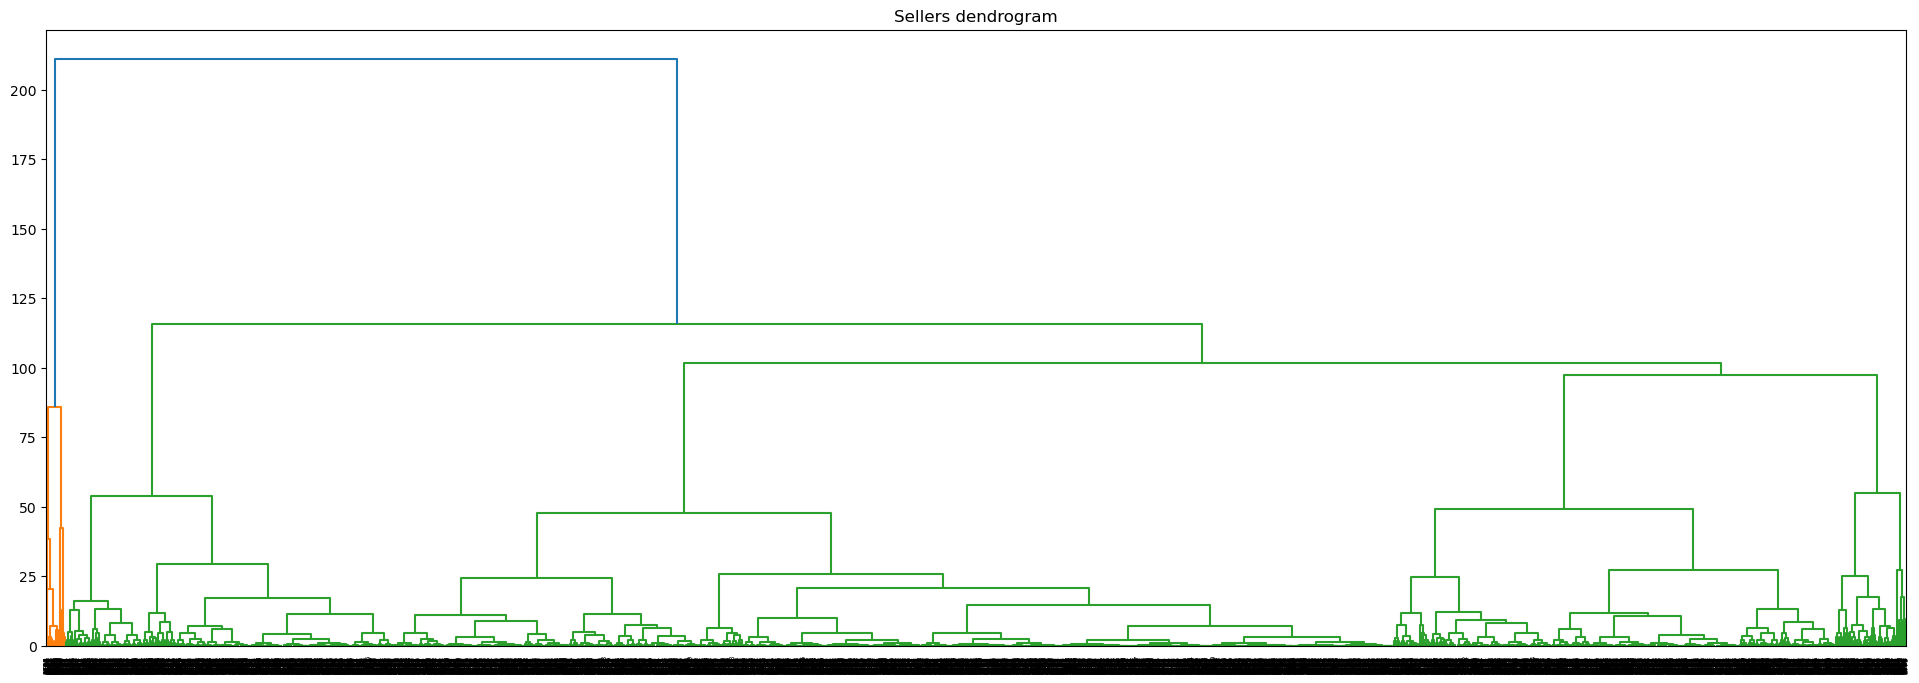

In [175]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(24, 8))  
plt.title("Sellers dendrogram")
data = scaled.sample(10000, replace=True)
link = shc.linkage(scaled, method='ward',metric='euclidean')
dend = shc.dendrogram(link)

Inconvénient de ce modèle, il prend beaucoup de temps et plus de ressources (car il y a des calculs mathématiques en cours)
- Si je veux déterminer le numéro des clusters à partir du Dendrogram, 2 clusters c'est la 1er option, et 3 la deuxième option.

In [176]:
from sklearn.cluster import KMeans, AgglomerativeClustering

X_hier = scaled.copy()
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agrup = cluster.fit_predict(X_hier) 
X_hier['labels'] = agrup
X_hier.groupby('labels').agg({'order_id':['count','median'],
                                        'product_id':'nunique',
                                        'payment_value':'median',
                                        'review_score':'median',
                                        'seller_id': 'nunique',
                                        'product_photos_qty':'median',            
                                                          })

order_id           product_id payment_value review_score seller_id  \
          count    median    nunique        median       median   nunique   
labels                                                                      
0          7573 -0.100742          1     -0.258899     0.719715         1   
1            97  9.190438          3     -0.213572     0.719715         3   
2          1645 -0.100742          1     -0.179218    -1.934079         1   

       product_photos_qty  
                   median  
labels                     
0               -0.148916  
1               -0.438632  
2               -0.728347

In [177]:
cl = cluster.fit_predict(X_hier)
labels = cluster.labels_

Plot des données avant et après Agglomerative Clustering avec 3 clusters :

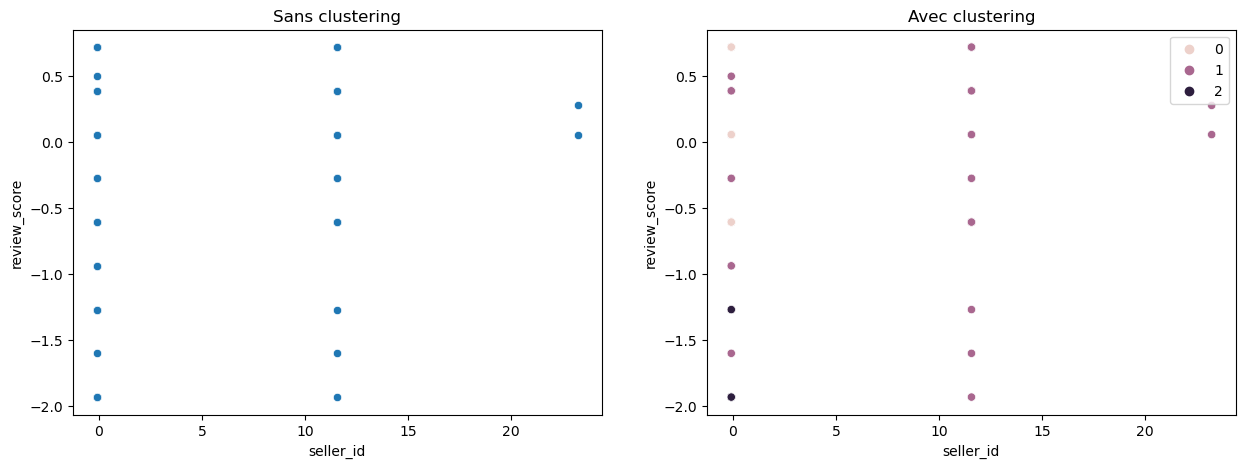

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=X_hier, x='seller_id', y='review_score').set_title('Sans clustering')
sns.scatterplot(ax=axes[1], data=X_hier, x='seller_id', y='review_score', hue=cluster.labels_).set_title('Avec clustering');

Lorsque ont utilise Agglomerative Clustering, ont n'ai pas besoin de prédéterminer le nombre de clusters. Comme nous l'avons vu dans le Dendrogramme, si nous ne déterminons pas le nombre de clusters que nous visons, l'algorithme divisera généralement les points en 2 clusters.

Essayons Agglomerative Clustering sans spécifier le nombre de clusters, et traçons les données sans Agglomerative Clustering, avec 3 clusters et sans clusters prédéfinis :

In [179]:
clustering_model_no_clusters = AgglomerativeClustering(linkage="ward")
clustering_model_no_clusters.fit(X_hier)
labels_no_clusters = clustering_model_no_clusters.labels_

Plot Agglomerative Clustering, avec 3 clusters et sans clusters prédéfinis :

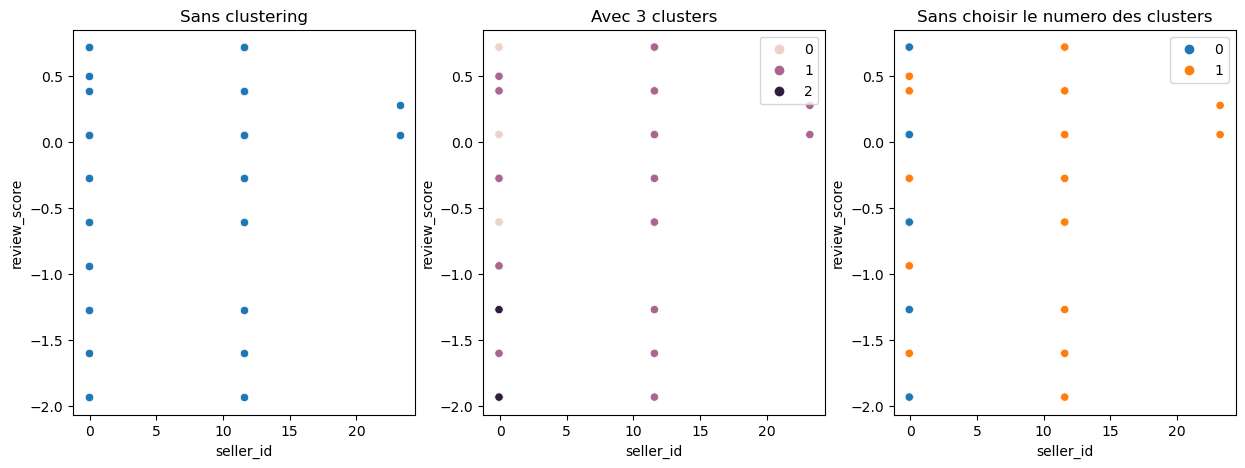

In [180]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=X_hier, x='seller_id', y='review_score').set_title('Sans clustering')
sns.scatterplot(ax=axes[1], data=X_hier, x='seller_id', y='review_score', hue=cluster.labels_).set_title('Avec 3 clusters')
sns.scatterplot(ax=axes[2], data=X_hier, x='seller_id', y='review_score', hue=clustering_model_no_clusters.labels_).set_title('Sans choisir le numero des clusters');

In [181]:
from sklearn.metrics import silhouette_score

In [182]:
silhouette_score(X_hier, agrup)

0.5413452752529869

# DBScan

In [183]:
X_db = X_hier.drop(("labels"), axis=1)
X_db

,order_id,product_id,payment_value,review_score,seller_id,product_photos_qty
0,-0.100742,-0.091538,-0.138261,0.719715,-0.081345,-0.728347
1,-0.100742,-0.091538,-0.585656,0.719715,-0.081345,-0.728347
2,-0.100742,-0.091538,-0.215982,0.056267,-0.081345,1.589374
3,-0.100742,-0.091538,-0.048469,-1.270631,-0.081345,-0.728347
4,-0.100742,-0.091538,0.078754,0.719715,-0.081345,1.589374
...,...,...,...,...,...,...
9310,-0.100742,-0.091538,-0.329487,0.719715,-0.081345,-0.728347
9311,-0.100742,-0.091538,-0.409246,0.719715,-0.081345,-0.728347
9312,-0.100742,-0.091538,0.092981,0.719715,-0.081345,-0.728347
9313,-0.100742,-0.091538,-0.371032,0.719715,-0.081345,-0.728347


In [184]:
X = X_db.values

In [185]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

Pour mes données, les distances produisent un plot k-distance elbow qui ressemble à ceci :

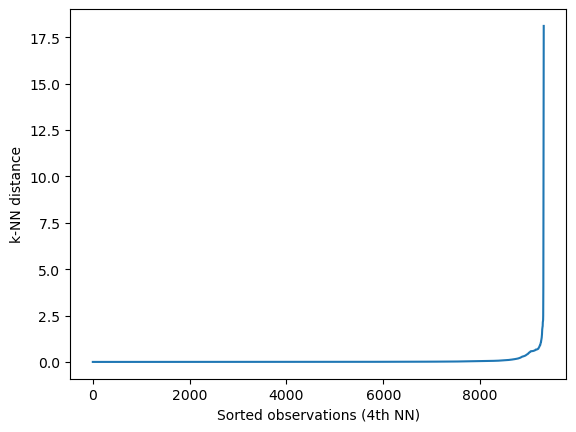

In [186]:
#check the eps 
sort_neight_distances = np.sort(distances, axis=0)
distances = sort_neight_distances[:,4]
plt.plot(distances);
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

La valeur idéale de ε sera égale à la valeur de la distance au « creux du coude », ou le point de courbure maximale, eps = 1. 
J'ai essaye plusiers combinaisons de valeurs MinPts et ε légèrement au-dessus et en dessous des valeurs estimées ici pour trouver le modèle le mieux ajusté.

In [187]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=1, min_samples=50)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [188]:
labels = dbscancluster.fit_predict(X)

In [189]:
np.unique(labels)

array([-1,  0])

In [190]:
list(clusters).count(-1)

254

In [191]:
len(set(clusters))

2

In [192]:
silhouette1 = silhouette_score(X, clusters)
silhouette1

0.7902794564569509

In [193]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=2, min_samples=1000)
dbscancluster.fit(X)
cluster2 = dbscancluster.labels_

In [194]:
list(cluster2).count(-1)

228

In [195]:
len(set(cluster2))

2

In [196]:
set(cluster2)

{-1, 0}

In [197]:
silhouette2 = silhouette_score(X, cluster2)
silhouette2

0.8038599254069767

In [198]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=3, min_samples=5000)
dbscancluster.fit(X)
cluster3 = dbscancluster.labels_

In [199]:
list(cluster3).count(-1)

164

In [200]:
set(cluster3)

{-1, 0}

In [201]:
silhouette3 = silhouette_score(X, cluster3)
silhouette3

0.8393619096460551

In [202]:
sillouette_moyen = (silhouette1 + silhouette2 + silhouette3) / 3
sillouette_moyen

0.8111670971699941

In [203]:
# n_neighbors = 12 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 12).fit(X)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

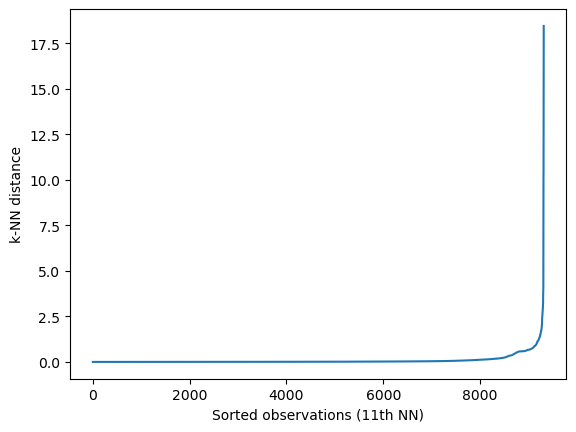

In [204]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 11]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (11th NN)")
plt.show()

In [205]:
!pip install --upgrade kneed

In [206]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

1.7259522967510632


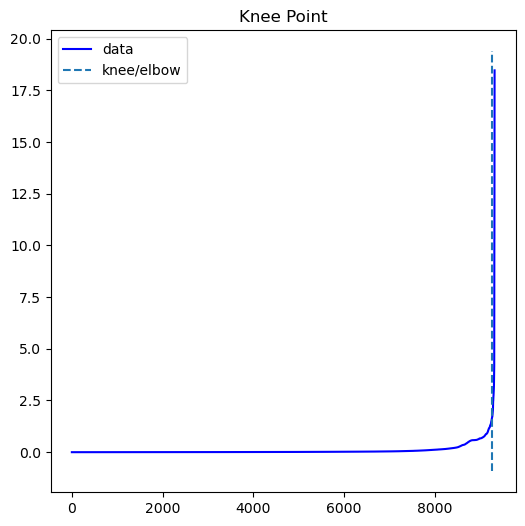

In [207]:
kneedle.plot_knee()
plt.show()

# Compute DBSCAN clustering

In [208]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 1.73, min_samples = 12).fit(X)
# get cluster labels
clusters.labels_

# check unique clusters
set(clusters.labels_)

# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3}

In [209]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 9201, 1: 57, -1: 25, 2: 14, 3: 18})

# Visualisation du clustering DBSCAN

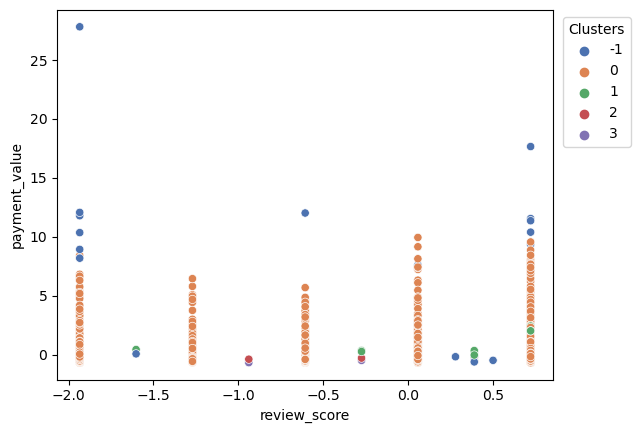

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = X_db, x = "review_score" , y = "payment_value", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()


# Conclusion Analyse DBSCAN :
Malgré le bon résultat de le silhouette score, cette modèle n'est pas bien adaptée pour notre problématique car il est base sur la densité. Il classifie les donnes dans 1 seul cluster et ceux où'il n'arrive pas à classifier dans ce cluster il classifie comme de la brouille, donc on n'arrive pas à faire une bonne segmentation.

In [211]:

# from sklearn.preprocessing import normalize

# scaled = normalize(X)
# scaled = pd.DataFrame(scaled)
# scaled

# Tester les modèles avec d'autres paramètres. 

In [212]:
new_data_2 =  df.groupby('customer_unique_id').agg({'order_id':'nunique',
                                    'product_id':'nunique',
                                    'payment_value':'mean',
                                    'review_score':'mean',
                                    'seller_id': 'nunique',
                                    'product_photos_qty':'median',
                                    'review_score' : 'mean',
                                    'customer_state' : pd.Series.mode,
                                    'payment_sequential' : 'mean', 
                                    'payment_value' : 'mean',
                                    'price' : 'median'
                                   })

In [213]:
new_data_2

,order_id,product_id,payment_value,review_score,seller_id,product_photos_qty,customer_state,payment_sequential,price
customer_unique_id,,,,,,,,,
0,1,1,141.90,5.0,1,1.0,SP,1.0,129.90
1,1,1,27.75,5.0,1,1.0,SP,1.0,14.96
2,1,1,122.07,4.0,1,5.0,BA,1.0,74.50
3,1,1,164.81,2.0,1,1.0,SP,1.0,26.99
4,1,1,197.27,5.0,1,5.0,MT,1.0,159.99
...,...,...,...,...,...,...,...,...,...
9310,1,1,93.11,5.0,1,1.0,MG,1.0,77.50
9311,1,1,72.76,5.0,1,1.0,SP,1.0,59.90
9312,1,1,200.90,5.0,1,1.0,RJ,1.0,129.94


In [214]:
dfdf = new_data_2.reset_index()
dfdf

,customer_unique_id,order_id,product_id,payment_value,review_score,seller_id,product_photos_qty,customer_state,payment_sequential,price
0,0,1,1,141.90,5.0,1,1.0,SP,1.0,129.90
1,1,1,1,27.75,5.0,1,1.0,SP,1.0,14.96
2,2,1,1,122.07,4.0,1,5.0,BA,1.0,74.50
3,3,1,1,164.81,2.0,1,1.0,SP,1.0,26.99
4,4,1,1,197.27,5.0,1,5.0,MT,1.0,159.99
...,...,...,...,...,...,...,...,...,...,...
9310,9310,1,1,93.11,5.0,1,1.0,MG,1.0,77.50
9311,9311,1,1,72.76,5.0,1,1.0,SP,1.0,59.90
9312,9312,1,1,200.90,5.0,1,1.0,RJ,1.0,129.94
9313,9313,1,1,82.51,5.0,1,1.0,PI,1.0,54.85


In [215]:
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9315 entries, 0 to 9314
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            9315 non-null   int64  
 1   product_id          9315 non-null   int64  
 2   payment_value       9315 non-null   float64
 3   review_score        9315 non-null   float64
 4   seller_id           9315 non-null   int64  
 5   product_photos_qty  9315 non-null   float64
 6   customer_state      9315 non-null   object 
 7   payment_sequential  9315 non-null   float64
 8   price               9315 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 727.7+ KB


In [216]:
new_data_2['customer_state']=encoder.fit_transform(new_data_2['customer_state'])

In [217]:
### label encoding city and state names
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
dfdf['customer_state']=encoder.fit_transform(new_data_2['customer_state'])

In [218]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_1=scaler.fit_transform(dfdf)

#tranform  it back to dataframe
Scaled_Data = pd.DataFrame(scaled_1, index = dfdf.index, columns = dfdf.columns)

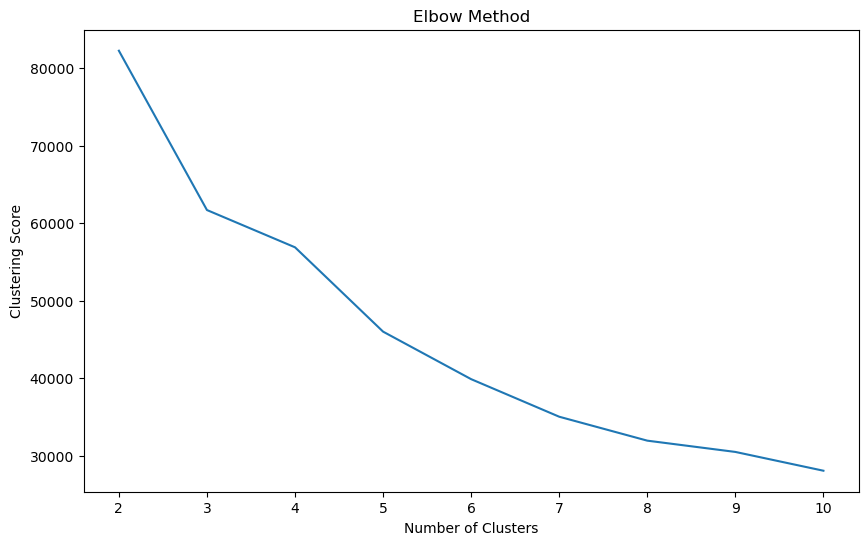

In [219]:
# Elbow Method with normalized data
from sklearn.cluster import KMeans
#try kmeans
individual_clustering_score = []
for i in range(2, 11):
    kmeans = KMeans (n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(Scaled_Data)
    individual_clustering_score.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [220]:
# Fit the model predict with normalized data 

kmeans = KMeans(n_clusters = 4, random_state=42)

kmeans.fit(Scaled_Data)

pred = kmeans.predict(Scaled_Data)

pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

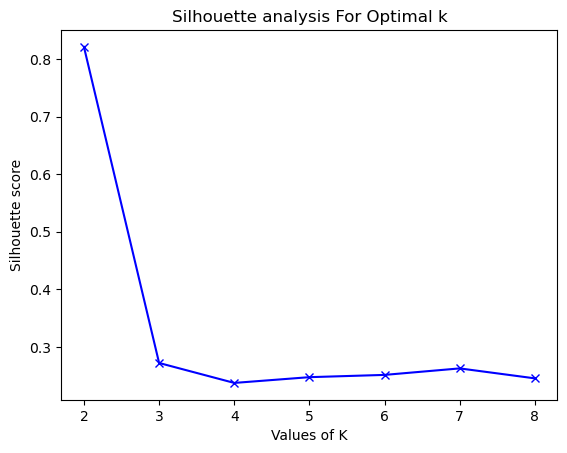

In [221]:
from sklearn.metrics import silhouette_score

# define our possible k values
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

# iterate through each of our values
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=num_clusters)
    # fit it on YOUR dataframe
    kmeans.fit(Scaled_Data)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(Scaled_Data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [222]:
dfdf

,customer_unique_id,order_id,product_id,payment_value,review_score,seller_id,product_photos_qty,customer_state,payment_sequential,price
0,0,1,1,141.90,5.0,1,1.0,25,1.0,129.90
1,1,1,1,27.75,5.0,1,1.0,25,1.0,14.96
2,2,1,1,122.07,4.0,1,5.0,4,1.0,74.50
3,3,1,1,164.81,2.0,1,1.0,25,1.0,26.99
4,4,1,1,197.27,5.0,1,5.0,12,1.0,159.99
...,...,...,...,...,...,...,...,...,...,...
9310,9310,1,1,93.11,5.0,1,1.0,10,1.0,77.50
9311,9311,1,1,72.76,5.0,1,1.0,25,1.0,59.90
9312,9312,1,1,200.90,5.0,1,1.0,18,1.0,129.94
9313,9313,1,1,82.51,5.0,1,1.0,16,1.0,54.85


In [223]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
dfdf['Cluster'] = (KMean_clust.labels_)

In [224]:
dfdf['Cluster'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<Figure size 700x700 with 0 Axes>

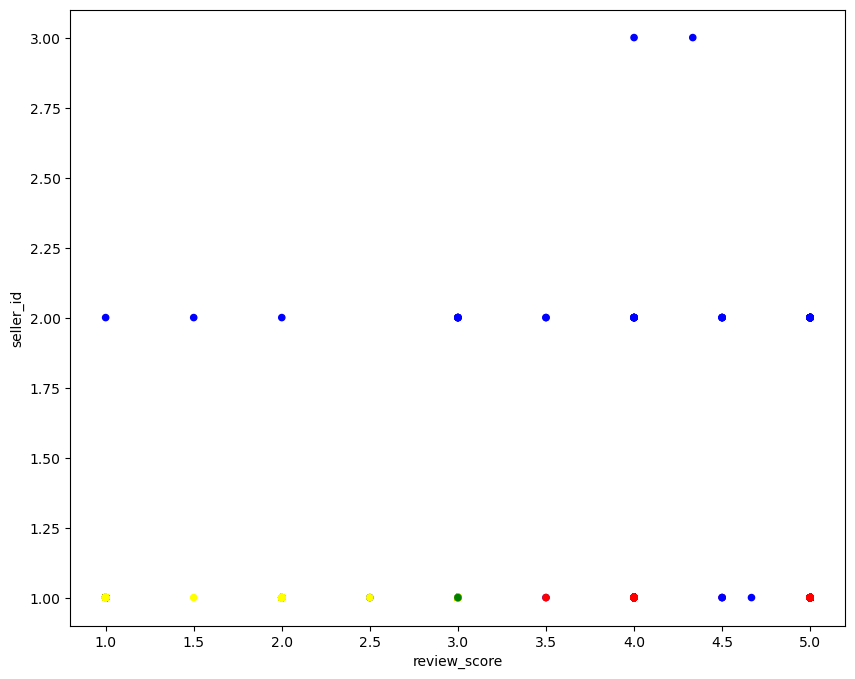

In [225]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
dfdf['Color'] = dfdf['Cluster'].map(lambda p: Colors[p])
ax = dfdf.plot(    
    kind="scatter", 
    x="review_score", y="seller_id",
    figsize=(10,8),
    c = dfdf['Color']
)

In [226]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans models
kmeans=KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model
kmeans.fit(Scaled_Data)

# Calculate Silhoutte Score
score = silhouette_score(Scaled_Data, kmeans.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score) 
new_data_2['Clusters']=(kmeans.labels_ +1)

Silhouetter Score: 0.238


In [227]:
silhouette_score(Scaled_Data, pred)

0.23752203472357164

Options to improve cluster (more number os variables and more number of records)

## Clustering Hiérarchique Agglomératif

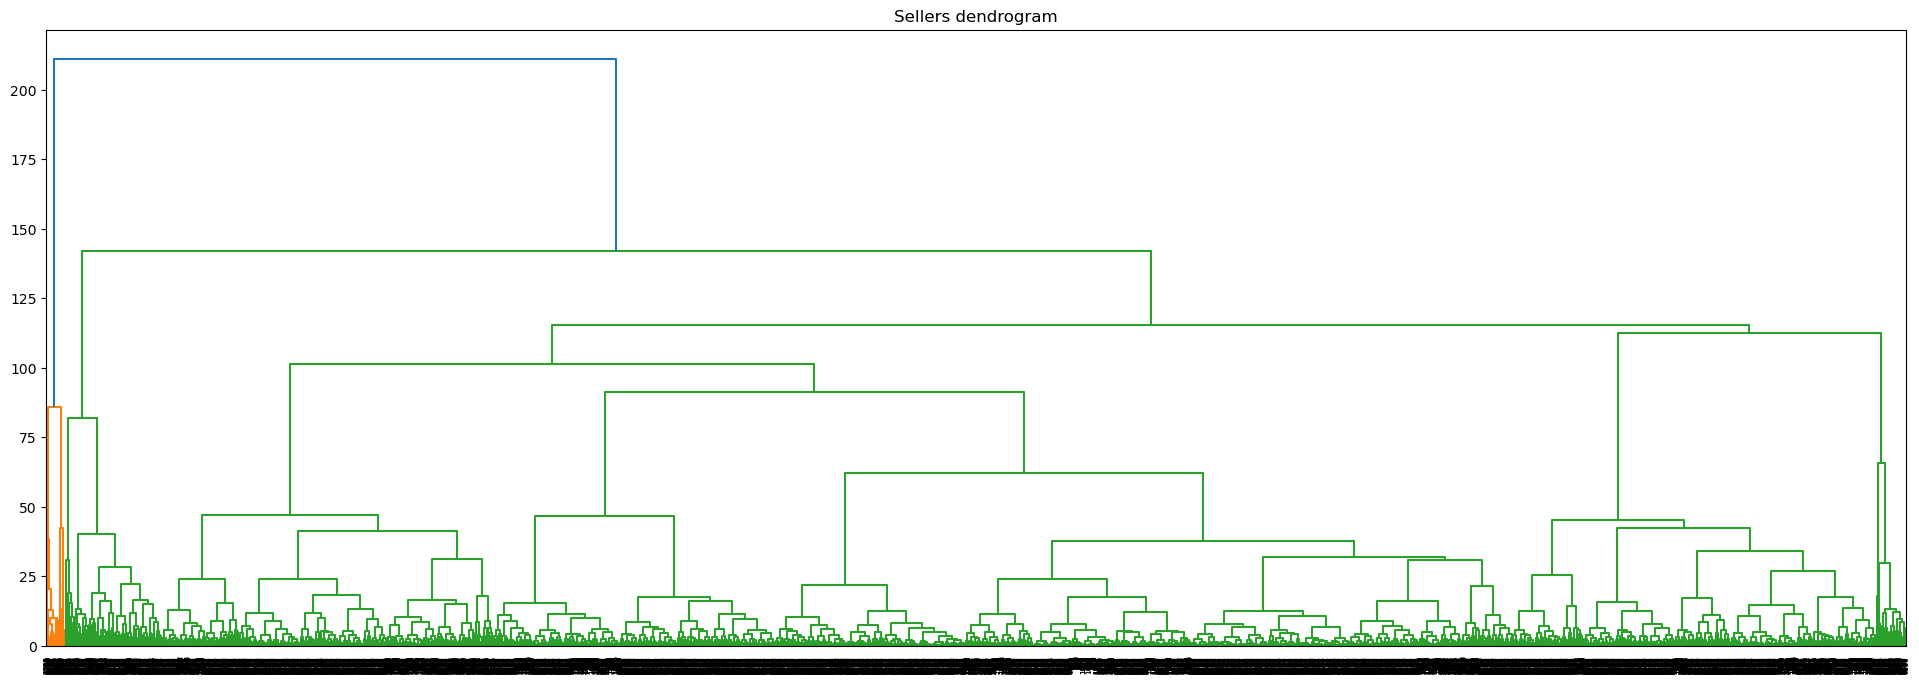

In [228]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(24, 8))  
plt.title("Sellers dendrogram")
data = Scaled_Data.sample(10000, replace=True)
link = shc.linkage(Scaled_Data, method='ward',metric='euclidean')
dend = shc.dendrogram(link)

In [229]:
#AgglomerativeClustering
from sklearn.cluster import KMeans, AgglomerativeClustering

X_today= Scaled_Data.copy()
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agrup = cluster.fit_predict(X_today) 
X_today['labels'] = agrup
X_today.groupby('labels').agg({'order_id':['count','median'],
                                          'product_id':'nunique',
                                          'payment_value':'mean',
                                          'review_score':'mean',
                                          'seller_id': 'nunique',
                                          'product_photos_qty':'median',
                                          'review_score' : 'mean',
                                          'customer_state' : pd.Series.mode,
                                          'payment_sequential' : 'mean', 
                                          'payment_value' : 'mean',
                                          'price' : 'median'
                                                          })

order_id           product_id payment_value review_score seller_id  \
          count    median    nunique          mean         mean   nunique   
labels                                                                      
0          9218 -0.100742          1      0.000419    -0.002319         1   
1            97  9.190438          3     -0.039854     0.220419         3   

       product_photos_qty customer_state payment_sequential     price  
                   median           mode               mean    median  
labels                                                                 
0               -0.728347       0.884749          -0.000429 -0.262029  
1               -0.438632       0.884749           0.040801 -0.250063

In [230]:
cl = cluster.fit_predict(X_today)

In [231]:
from sklearn.metrics import silhouette_score

In [232]:
silhouette_score(X_today, agrup)

0.8073927948302935

## DbScan

In [233]:
DBSCAN_dataset = Scaled_Data.copy()

In [234]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=500)
nbrs = neigh.fit(DBSCAN_dataset)
distances, indices = nbrs.kneighbors(DBSCAN_dataset)

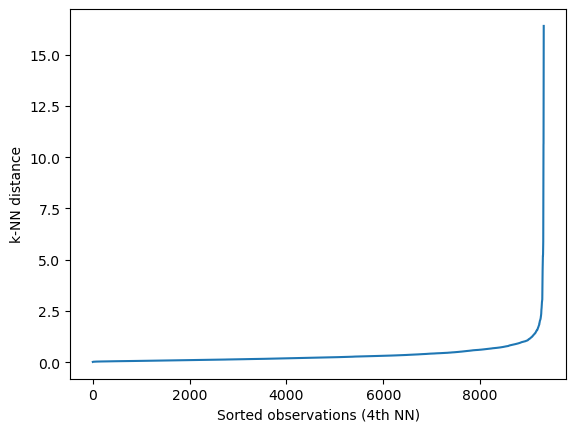

In [235]:
distances = np.sort(distances, axis=0)
k_dist = distances[:, 2]
plt.plot(k_dist);
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

#### Compute DBSCAN clustering

In [236]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 2 , min_samples = 500).fit(DBSCAN_dataset)
# get cluster labels
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [237]:
# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [238]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 8746, -1: 569})

Le Db Scan n'est pas  un bon algorithm pour ce probleme, car il classifie tout les clients dans 1 seule cluster et le reste classifique comment etand du noise. 

In [239]:
silhouette = silhouette_score(DBSCAN_dataset, clusters.labels_)
silhouette

0.6253413954258181